<h1 style="color:red;" >  EDA - Forest Fire Data Set </h1>

<h4  style="color: Black;">Import packages.</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
import statistics
from IPython.display import display
pd.options.display.max_columns = 200
pd.set_option('display.max_rows', None)
#It computes the probability of an event occurrence.

In [2]:
td=pd.read_csv("../Data/titanic/train.csv")

##### td

In [26]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
td.shape


(891, 12)

In [4]:
td.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
(td.isna().sum()*100/td.shape[0])
#(td['Survived'].value_counts()*100/td.shape[0])

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [18]:
#df1.isna().mean()[df1.isna().any()].so  rt_values()
td.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [19]:
[td.isna().any()]

[PassengerId    False
 Survived       False
 Pclass         False
 Name           False
 Sex            False
 Age             True
 SibSp          False
 Parch          False
 Ticket         False
 Fare           False
 Cabin           True
 Embarked        True
 dtype: bool]

In [32]:
target_cols = td.columns[2:]

In [33]:
target_cols


Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [34]:
##td[target_cols].sum().sort_values().plot(kind='bar', figsize=(12, 7))
td[target_cols].sum().sort_values().plot(kind='bar', figsize=(12, 7))

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

In [23]:
td.isna().mean()[td.isna().any()].sort_values()

Embarked    0.002245
Age         0.198653
Cabin       0.771044
dtype: float64

In [12]:
td['Age'].isnull().sum()

177

In [9]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
td.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andreasson, Mr. Paul Edvin",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [416]:
#def toObj(colList, tdc):
#     tdCopy[i]= tdc.copy
    
#    for i in colList:
   #     tdCopy[i] = pd.toObj(tdCopy[i])
  #  retrn tdCopy
     
#wrongcast = ['female','male','C','Q','S',]
#td = toObj(wrongcast, td)


In [417]:
#All the data types are matched with the data

In [418]:
#td['survivedGender'] = [str(i) for i in td['Survived']] + td['Sex']

In [419]:
#td.groupby(['survivedGender']).count()

In [420]:
109/(468 + 109)

0.18890814558058924

In [421]:
233/(233 + 81)

0.7420382165605095

In [422]:
#td.drop('survivedGender', axis =1)

In [423]:
#(td['survivedGender'].value_counts()*100/td.shape[0]).plot.bar(title = 'surived class')

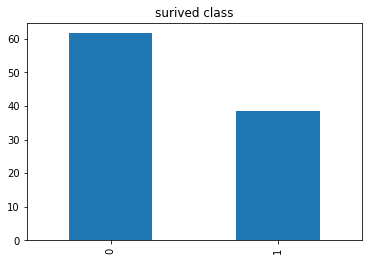

In [12]:
(td['Survived'].value_counts()*100/td.shape[0]).plot.bar(title = 'surived class')


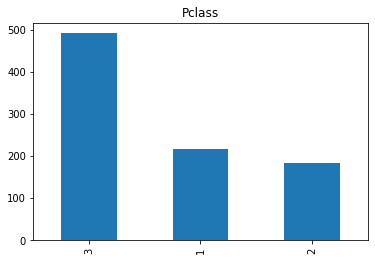

In [13]:
td['Pclass'].value_counts().plot.bar(title='Pclass')

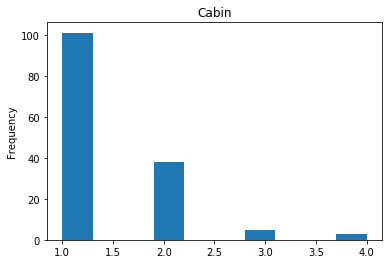

In [426]:
td['Cabin'].value_counts().plot.hist(title='Cabin')

In [427]:
#td['Cabin'].value_counts().plot.bar(title='Cabin')

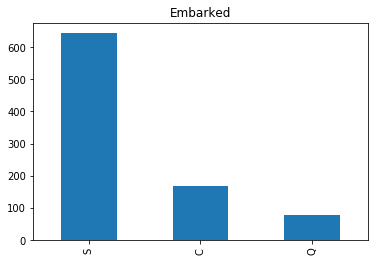

In [14]:
td['Embarked'].value_counts().plot.bar(title='Embarked')

In [429]:
#Found missing values in Age, Cabin, Embarked - 
#Need Missing values trearment for this
#Need clarification how to treat missing values in Age.
#Cabin is a categoricl a value, i think we can fill with the mode value but there are many missing values in the Cabin column need to check.
#Emabarked also a caterogical value, we can fill it with mode.but need to check bcaus embarked cloumn is for boarding point we can thinkin a way that is there any speccility for that place to baord the ship more in numbers. need to check wirth anna.
#i wnat to make plotm for both Survived and PClass stogether to see the relation  between them
#and also for Surivided and Age columns.

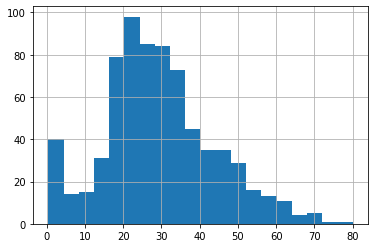

In [15]:
td['Age'].hist(bins=20)

In [431]:
#Here the data is right skewed, so we go with median.

In [16]:
td.groupby(['Pclass']).count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


Text(0, 0.5, 'Survived')

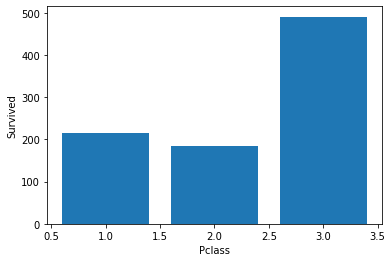

In [17]:
pt.figure()
pt.bar(td.groupby(['Pclass']).count().index, td.groupby(['Pclass']).count()['Survived'])
pt.xlabel('Pclass')
pt.ylabel('Survived')
#i want some clarification about choosing plots

In [18]:
td['Embarked']=td['Embarked'].fillna(statistics.mode(td['Embarked']))


In [19]:
td['Age'] = td['Age'].fillna(statistics.median(td[~td['Age'].isna()]['Age']))


In [20]:
statistics.median(td[~td['Age'].isna()]['Age'])

28.0

In [21]:
td['Age']

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
5      28.00
6      54.00
7       2.00
8      27.00
9      14.00
10      4.00
11     58.00
12     20.00
13     39.00
14     14.00
15     55.00
16      2.00
17     28.00
18     31.00
19     28.00
20     35.00
21     34.00
22     15.00
23     28.00
24      8.00
25     38.00
26     28.00
27     19.00
28     28.00
29     28.00
30     40.00
31     28.00
32     28.00
33     66.00
34     28.00
35     42.00
36     28.00
37     21.00
38     18.00
39     14.00
40     40.00
41     27.00
42     28.00
43      3.00
44     19.00
45     28.00
46     28.00
47     28.00
48     28.00
49     18.00
50      7.00
51     21.00
52     49.00
53     29.00
54     65.00
55     28.00
56     21.00
57     28.50
58      5.00
59     11.00
60     22.00
61     38.00
62     45.00
63      4.00
64     28.00
65     28.00
66     29.00
67     19.00
68     17.00
69     26.00
70     32.00
71     16.00
72     21.00
73     26.00
74     32.00
75     25.00
76     28.00

In [23]:
td['Age'].isnull().sum()

0

In [28]:
#td['Cabin'] = td['Cabin'].fillna('Others')
#ttd= ttd.drop('Cabin', axis =1  )

In [24]:
cormat =td.corr()


In [25]:
cormat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


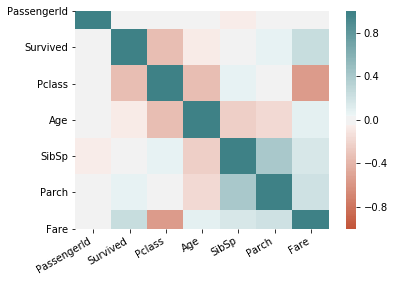

In [442]:
#fax = pt.subplots(figsize=(12, 9))
#sns.heatmap(cormat, vmax=.8, square=True);


ax = sns.heatmap(
    cormat, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);

In [443]:
#cormat.to_excel("../outputs/titaniccormat.xlsx")

In [444]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
#Dropping coloumns Name and Ticket
eliminateVariables = ['Name','Ticket']
td = td.drop(eliminateVariables,axis= 1)


In [42]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [26]:
dummy1 = pd.get_dummies(td['Sex'])
td = pd.concat([dummy1,td], axis=1)

In [27]:
dummy2 = pd.get_dummies(td['Pclass'])
td = pd. concat([dummy2, td], axis = 1)

In [28]:
dummy4 = pd.get_dummies(td['Embarked'])
td = pd. concat([dummy4, td], axis = 1)

In [29]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
1              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
female         891 non-null uint8
male           891 non-null uint8
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5), uint8(8)
memory usage: 90.6+ KB


In [30]:
td.shape

(891, 20)

In [37]:
EV = ['Pclass', 'Cabin', 'Embarked','PassengerId','Sex']
td = td.drop(EV, axis =1)

KeyError: "['Pclass' 'Cabin' 'Embarked' 'PassengerId' 'Sex'] not found in axis"

In [32]:
tdCopy = td.copy()

In [455]:
#tdCopy

In [456]:
#td= td.drop('survivedGender', axis =1) 

In [457]:
#td

In [33]:
x = td.drop('Survived', axis =1)

In [34]:
y = td['Survived']

In [35]:
x

,C,Q,S,1,2,3,female,male,Name,Age,SibSp,Parch,Ticket,Fare
0,0,0,1,0,0,1,0,1,"Braund, Mr. Owen Harris",22.00,1,0,A/5 21171,7.2500
1,1,0,0,1,0,0,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00,1,0,PC 17599,71.2833
2,0,0,1,0,0,1,1,0,"Heikkinen, Miss. Laina",26.00,0,0,STON/O2. 3101282,7.9250
3,0,0,1,1,0,0,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00,1,0,113803,53.1000
4,0,0,1,0,0,1,0,1,"Allen, Mr. William Henry",35.00,0,0,373450,8.0500
5,0,1,0,0,0,1,0,1,"Moran, Mr. James",28.00,0,0,330877,8.4583
6,0,0,1,1,0,0,0,1,"McCarthy, Mr. Timothy J",54.00,0,0,17463,51.8625
7,0,0,1,0,0,1,0,1,"Palsson, Master. Gosta Leonard",2.00,3,1,349909,21.0750
8,0,0,1,0,0,1,1,0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.00,0,2,347742,11.1333
9,1,0,0,0,1,0,1,0,"Nasser, Mrs. Nicholas (Adele Achem)",14.00,1,0,237736,30.0708


In [36]:
y


0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     0
35     0
36     1
37     0
38     0
39     1
40     0
41     0
42     0
43     1
44     1
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     1
53     1
54     0
55     1
56     1
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     1
66     1
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     1
75     0
76     0
77     0
78     1
79     1
80     0
81     1
82     1
83     0
84     1
85     1
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    1
108    0
109    1
110    0
1

In [462]:
from sklearn.model_selection import train_test_split
sv_train, sv_test, tv_train, tv_test = train_test_split(x, y, test_size = 0.25,random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression


In [15]:
logReg = LogisticRegression()

In [465]:
#tv_train

In [20]:
td.shape

(891, 12)

In [21]:
model = LogisticRegression().fit(sv_train, tv_train)

NameError: name 'sv_train' is not defined

sv_test has only 223 rows how it will predict with the model which is trained with 663 rows

In [468]:
prediction = model.predict(sv_test)

In [469]:
#pd.DataFrame({'col': columns, 'coeff': coeff} ).to_excel('../Outputs/titaniccoeff.xslx')
#pd.DataFrame({'Survived act': y , ' Survived Predicted': model.predict(x)} ).to_excel('../Outputs/titanicpred.xlsx')


In [470]:
from sklearn import metrics

In [471]:
sv_train.shape
#tv_test.shape

(668, 12)

In [472]:
sv_test.shape
#tv_test.shape

(223, 12)

In [473]:

cnf_matrix = metrics.confusion_matrix(tv_test, prediction)
cnf_matrix

array([[117,  22],
       [ 23,  61]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

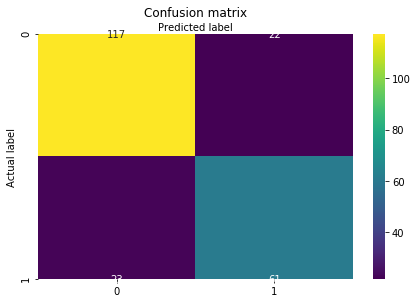

In [474]:
fig, ax = pt.subplots()
#pt.xticks(tick_marks, tv_train)
#pt.yticks(tick_marks, prediction)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
pt.tight_layout()
pt.title('Confusion matrix', y=1.1)
pt.ylabel('Actual label')
pt.xlabel('Predicted label')

In [475]:
print("Accuracy", metrics.accuracy_score(tv_test, prediction))
print("Precision", metrics.precision_score(tv_test, prediction))
print("Recall", metrics.recall_score(tv_test, prediction))

Accuracy 0.7982062780269058
Precision 0.7349397590361446
Recall 0.7261904761904762


In [476]:
#Titanic test data taken frm Kaggle
ttd = pd.read_csv('../Data/test.csv')



In [477]:
ttd.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [478]:
ttd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S


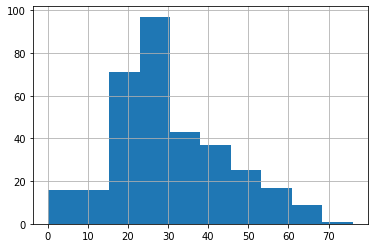

In [479]:
ttd['Age'].hist(bins = 10)

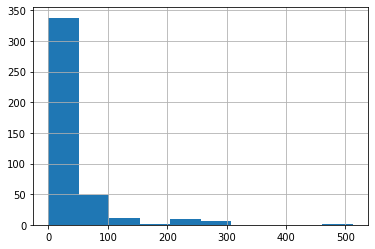

In [480]:
ttd['Fare'].hist(bins =10)

In [481]:
ttd.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Payne, Mr. Vivian Ponsonby",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [482]:
#replace the missinf values of Age wih median i.e 28
#replace fare missing value with 32.204208
ttd['Age'] = ttd['Age'].fillna('28')
#ttd = ttd.drop('PassengerId')



In [483]:
ttd['Age']

0      34.5
1        47
2        62
3        27
4        22
5        14
6        30
7        26
8        18
9        21
10       28
11       46
12       23
13       63
14       47
15       24
16       35
17       21
18       27
19       45
20       55
21        9
22       28
23       21
24       48
25       50
26       22
27     22.5
28       41
29       28
30       50
31       24
32       33
33       28
34       30
35     18.5
36       28
37       21
38       25
39       28
40       39
41       28
42       41
43       30
44       45
45       25
46       45
47       28
48       60
49       36
50       24
51       27
52       20
53       28
54       28
55       10
56       35
57       25
58       28
59       36
60       17
61       32
62       18
63       22
64       13
65       28
66       18
67       47
68       31
69       60
70       24
71       21
72       29
73     28.5
74       35
75     32.5
76       28
77       55
78       30
79       24
80        6
81       67
82       49
83  

In [484]:
ttd['Age'].isnull().sum()

0

In [485]:
ttd['Fare'] = ttd['Fare']. fillna(32.204208)

In [486]:
ttd['Fare'].isnull().sum()

0

In [487]:
#ttd['Cabin'] = ttd['Cabin'].fillna("Others")

In [488]:
ttd = ttd.drop(['PassengerId','Name', 'Cabin'], axis =1)

In [489]:
ttd = ttd.drop('Ticket', axis =1)

In [513]:
ttd

,C,Q,S,1,2,3,female,male,Age,SibSp,Parch,Fare
0,0,1,0,0,0,1,0,1,34.5,0,0,7.829200
1,0,0,1,0,0,1,1,0,47,1,0,7.000000
2,0,1,0,0,1,0,0,1,62,0,0,9.687500
3,0,0,1,0,0,1,0,1,27,0,0,8.662500
4,0,0,1,0,0,1,1,0,22,1,1,12.287500
5,0,0,1,0,0,1,0,1,14,0,0,9.225000
6,0,1,0,0,0,1,1,0,30,0,0,7.629200
7,0,0,1,0,1,0,0,1,26,1,1,29.000000
8,1,0,0,0,0,1,1,0,18,0,0,7.229200
9,0,0,1,0,0,1,0,1,21,2,0,24.150000


In [514]:
ttd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
C         418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
1         418 non-null uint8
2         418 non-null uint8
3         418 non-null uint8
female    418 non-null uint8
male      418 non-null uint8
Age       418 non-null object
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
dtypes: float64(1), int64(2), object(1), uint8(8)
memory usage: 16.5+ KB


In [492]:
dummy6 = pd.get_dummies(ttd['Sex'])
ttd = pd.concat([dummy6,ttd], axis=1)#done

In [493]:
dummy5 = pd.get_dummies(ttd['Pclass'])

ttd = pd.concat([dummy5,ttd], axis=1)#done

In [494]:
dummy7 = pd.get_dummies(ttd['Embarked'])
ttd = pd.concat([dummy7,ttd], axis = 1)#i imputed the dummies into td i.e for train data so please `


In [495]:
ttd.shape
#sv_train.shape

(418, 15)

In [496]:
#ttd = ttd.drop(['Cabin'], axis = 1)

In [497]:
#dummy8 = pd.get_dummies(ttd['Cabin'])
#ttd = pd.concat([dummy8,ttd], axis = 1)#i imputed the dummies into td i.e for train data so please


In [498]:
ttd = ttd.drop(['Sex','Embarked','Pclass'], axis = 1)

In [499]:
ttd.to_excel('../Outputs/ttd.xlsx')

In [500]:
ttd.shape

(418, 12)

In [501]:
#ttd = ttd.drop('Cabin', axis= 1)

In [502]:
A=set(sv_train.columns)
B=set(ttd.columns)

In [503]:
print(len(A))
print(len(B))

12
12


In [504]:
#print(len(A-B))#we should add to test data(ttd)  becasuse these are present in train data but not in test data.

In [505]:
#print(len(B-A))#we should drop these columns as these columns are presenrt in test data set bu not in train data set,As we did not traio the modle woth these columns

In [506]:
#remove = B-A

In [507]:
#columns =A-B

In [508]:
#columns

In [509]:
#traindatacopy = td.copy

In [510]:
#ttdcopy = ttd.copy()

In [526]:
#for i in remove:
  #  ttd=  ttd.drop(i, axis =1)

In [ ]:
#ttd
#ttd.shape

In [ ]:
#for i in columns:
#ttd[i] = 0

In [ ]:
ttd.shape

In [ ]:
testP = model.predict(ttd)

In [ ]:
testP

In [ ]:
ttd.shape

In [ ]:
#print("Accuracy:",metrics.accuracy_score(tv_test, testP))
#print("Precision:",metrics.precision_score(tv_test, testP))
#print("Recall:",metrics.recall_score(tv_test, testP))

In [ ]:
testdata= pd.read_csv('../Data/test.csv')

In [ ]:
testdata

In [ ]:
PassengerId =testdata['PassengerId']

In [ ]:
#sv_train.shape

In [ ]:
#tv_train.shape

In [ ]:
pd.DataFrame({'PassengerId': PassengerId, 'Survived': testP} ).to_csv('../Outputs/gender_submission.csv')

In [ ]:
Compare with the blog there splitting data set into x_train, y_train and buildongh the model. And passing x_test for prediction and pssing Y_test in the accuracy
If some client comes and gives a data set there we will have or not y values i think we will not have) we can predict by giving the data by saving it itnoone variable i.e X and but how can we calculate accuracy, precission, recall values what we have ti give as act
ual value.

In [ ]:
from sklearn.ensemble import RandomForestClassifier 


m = RandomForestClassifier(n_estimators=1, max_depth=2,  bootstrap=False)
m.fit(sv_train, tv_train)
#draw_tree(m.estimators_[0], sv_train, precision=2)

In [ ]:
sv_test.shape

In [ ]:
#RF_predictions = RF_model.predict(test_X)
score = metrics.accuracy_score(tv_test, RFT)
print(score)


In [ ]:
RFT = m.predict(sv_test)

In [ ]:
ttd.shape

In [ ]:
RF_Prediction = m.predict(ttd)


In [ ]:
#RF_Prediction3 #stored in output for RF_prediction
pd.DataFrame({'PassengerId': PassengerId, 'Survived': RF_Prediction} ).to_csv('../Output/gender_submission.csv')

In [ ]:
RF_Prediction 

In [512]:
print("Accuracy:",metrics.accuracy_score(tv_test, RFT))
print("Precision:",metrics.precision_score(tv_test, RFT))
print("Recall:",metrics.recall_score(tv_test, RFT))

Accuracy: 0.7174887892376681
Precision: 0.7058823529411765
Recall: 0.42857142857142855
